In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


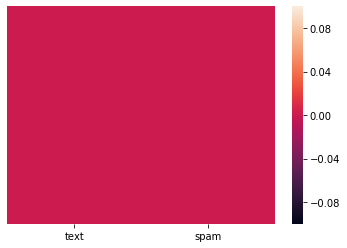

In [4]:
sns.heatmap(df.isnull(),  yticklabels=False)

In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


0    4360
1    1368
Name: spam, dtype: int64

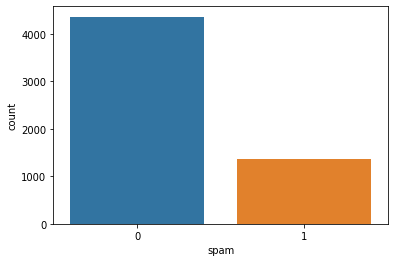

In [7]:
sns.countplot(x = "spam", data = df)
df["spam"].value_counts()

In [8]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
hamdf=df[df['spam']==0]
spamdf=df[df['spam']==1]


In [10]:
hamdf=hamdf.sample(spamdf.shape[0])

final_dataframe=hamdf.append(spamdf,ignore_index=True)


In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(final_dataframe["text"],final_dataframe["spam"],test_size=0.2,random_state=0,shuffle=True)

In [14]:
import time
start=time.time()
model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",GradientBoostingClassifier())])

model.fit(X_train,Y_train)
end=time.time()
print(f"Training Time=={end-start}")

Training Time==30.772350072860718


In [18]:
Y_pred=model.predict(X_test)
for i in Y_pred:
    if i==1:
        print("spam")
    else:
        print("Ham")

Ham
Ham
Ham
Ham
spam
spam
Ham
spam
spam
Ham
spam
Ham
Ham
spam
Ham
Ham
spam
spam
spam
Ham
Ham
Ham
Ham
Ham
spam
spam
Ham
Ham
Ham
spam
Ham
Ham
Ham
spam
spam
spam
Ham
spam
spam
spam
Ham
spam
Ham
spam
spam
spam
Ham
spam
spam
Ham
spam
Ham
Ham
spam
Ham
spam
Ham
Ham
Ham
spam
Ham
Ham
Ham
spam
spam
spam
spam
spam
spam
Ham
spam
Ham
Ham
spam
spam
spam
Ham
spam
spam
Ham
Ham
Ham
spam
spam
Ham
spam
Ham
Ham
Ham
spam
Ham
spam
Ham
spam
spam
spam
Ham
spam
spam
spam
Ham
Ham
spam
spam
spam
spam
Ham
Ham
Ham
Ham
Ham
spam
Ham
Ham
spam
spam
Ham
Ham
spam
spam
spam
spam
Ham
Ham
Ham
spam
spam
Ham
spam
spam
Ham
Ham
spam
spam
spam
spam
Ham
spam
Ham
spam
spam
spam
Ham
spam
spam
spam
spam
Ham
Ham
Ham
spam
spam
Ham
Ham
spam
spam
spam
spam
spam
spam
Ham
Ham
Ham
Ham
Ham
spam
spam
spam
spam
spam
Ham
Ham
spam
Ham
spam
Ham
spam
spam
spam
spam
Ham
spam
spam
Ham
spam
Ham
spam
spam
Ham
Ham
Ham
spam
spam
Ham
spam
Ham
Ham
Ham
Ham
spam
spam
spam
spam
Ham
Ham
spam
Ham
spam
Ham
spam
Ham
Ham
spam
Ham
spam
Ham
Ham
Ham
spam
Ham
Ham
s

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)



array([[247,  20],
       [  1, 280]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       267
           1       0.93      1.00      0.96       281

    accuracy                           0.96       548
   macro avg       0.96      0.96      0.96       548
weighted avg       0.96      0.96      0.96       548



In [21]:
cnf=confusion_matrix(Y_test,Y_pred)

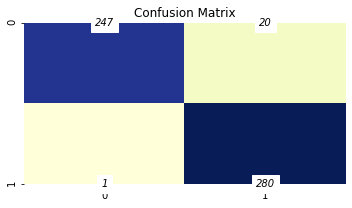

In [22]:
plt.figure(figsize = (5, 5))
annot_kws={'fontsize':10,'fontstyle':'italic','color':"k",'va':'center',"ha":'center','alpha':1,'backgroundcolor':'w'
}
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)),annot=True, cmap="YlGnBu" ,fmt="d",annot_kws=annot_kws,square=True,cbar=False)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [23]:
df1 = Y_pred

In [24]:
df1 = pd.DataFrame(df1)

In [25]:
df1.rename(columns={0: "Predicted Emails"}, inplace=True)
df1

,Predicted Emails
0,0
1,0
2,0
3,0
4,1
...,...
543,1
544,1
545,0
546,0


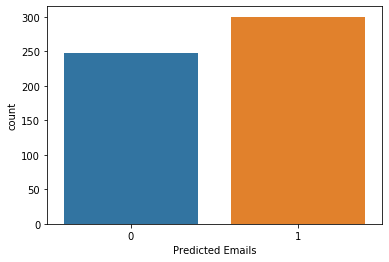

In [26]:
sns.countplot(x = "Predicted Emails", data = df1)
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
print(accuracy_score(Y_test,Y_pred))

0.9616788321167883
